In [1]:
# pip install psycopg2-binary

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import psycopg2
import warnings
warnings.filterwarnings('ignore')

In [3]:
conn_string = "host='localhost' dbname='FoodOrders_Database' user='postgres' password='ak0001'"
conn = psycopg2.connect(conn_string)

In [4]:
def fetch_data(query):
    return pd.read_sql_query(query, conn)
#conn.close()

### Get the Total Successful And Fail Orders

Text(0.5, 1.0, 'Total Successful And Fail Orders')

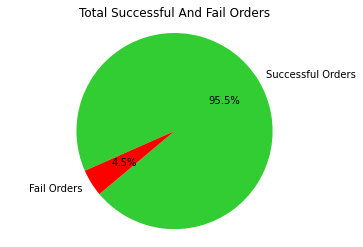

In [5]:
query = """
SELECT SUM(successful_orders) AS total_successful,
SUM(fail_orders) AS total_faild
FROM restaurant_orders;
        """
data = fetch_data(query)
labels = ['Successful Orders', 'Fail Orders']
colors = ['limegreen', 'red']
sizes = [data['total_successful'][0],data['total_faild'][0]]
explode = (0, 0.1)
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', startangle=220 )
plt.axis('equal')
plt.title('Total Successful And Fail Orders')

### Get the Number Of Restaurents Per Specialization

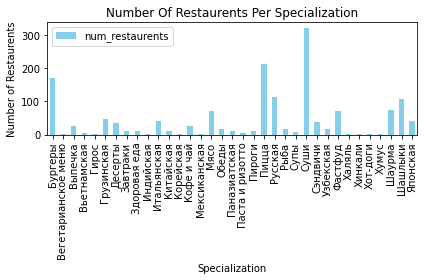

In [6]:
query ="""
SELECT spec, COUNT(DISTINCT(vendor_id))AS num_restaurents
FROM restaurant_orders
GROUP BY spec;
"""
data = fetch_data(query)
data.plot(kind='bar', x='spec', y='num_restaurents' ,color = 'skyblue', legend = True)
plt.xlabel('Specialization')
plt.ylabel('Number of Restaurents')
plt.title('Number Of Restaurents Per Specialization')
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

### Get the total Number of Successful Orders and Faild Ordes per city

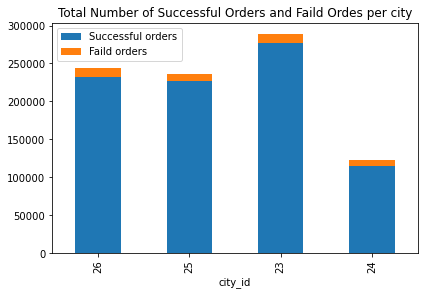

In [7]:
query = """
SELECT city_id, 
SUM(successful_orders) AS total_successful,
SUM (fail_orders) AS total_faild
FROM restaurant_orders
GROUP BY city_id;
"""
data = fetch_data(query)
data.plot(kind='bar', x='city_id', y=['total_successful', 'total_faild'] , stacked = True )
plt.legend(['Successful orders','Faild orders'])
plt.tight_layout()
plt.title('Total Number of Successful Orders and Faild Ordes per city')
plt.show()

### Get the average orders per day

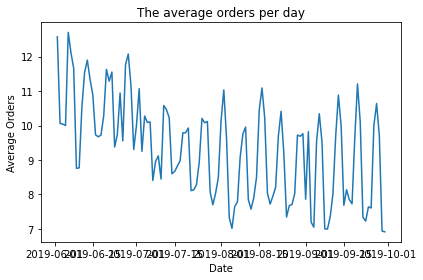

In [8]:
query = """
SELECT date,
AVG(successful_orders+fail_orders) AS avg_orders
FROM restaurant_orders
GROUP BY date
ORDER BY date;
"""
data = fetch_data(query)
data.plot(kind='line', x='date', y='avg_orders' , legend = False )
plt.xlabel('Date')
plt.ylabel('Average Orders')
plt.title('The average orders per day')
plt.tight_layout()
plt.show()

### Get the top 4 cities by Total Orders

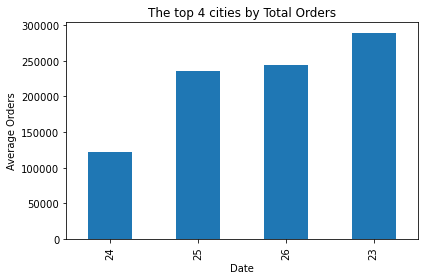

In [9]:
query = """
SELECT city_id,
SUM(successful_orders + fail_orders) AS total_orders
FROM restaurant_orders
GROUP BY city_id
ORDER BY total_orders
LIMIT 4;
"""
data = fetch_data(query)
data.plot(kind='bar', x='city_id', y='total_orders' , legend = False,)
plt.xlabel('Date')
plt.ylabel('Average Orders')
plt.title('The top 4 cities by Total Orders')
plt.tight_layout()
plt.show()

### Success Rate By Specialization

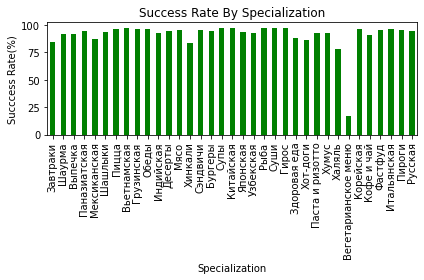

In [10]:
query = """
SELECT spec,
SUM(successful_orders) AS total_successful,
SUM(fail_orders) AS total_faild,
(SUM(successful_orders) * 100/ (SUM(successful_orders) +SUM(fail_orders))) AS success_rate
FROM restaurant_orders
GROUP BY spec;
"""
data = data = fetch_data(query)
data.plot(kind='bar', x='spec', y='success_rate' , legend = False, color ='green')
plt.xlabel('Specialization')
plt.ylabel('Succcess Rate(%)')
plt.title('Success Rate By Specialization')
plt.tight_layout()
plt.xticks(rotation= 90)
plt.show()

### Monthly Order Trends 

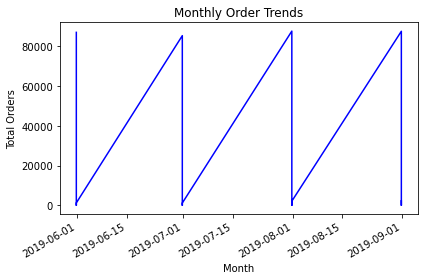

In [11]:
query = """
SELECT date_trunc ('month', date)
AS month, spec,
SUM (successful_orders) AS total_successful,
SUM(fail_orders) AS total_failed,
(SUM(successful_orders) * 100 / (SUM(successful_orders) + SUM(fail_orders))) AS success_rate
FROM restaurant_orders
GROUP BY month, spec
ORDER BY month, spec;
"""
data = fetch_data(query)
data.plot(kind='line', x='month', y='total_successful' , legend = False, color ='blue')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Monthly Order Trends')
plt.tight_layout()
plt.show()